## Extract Text Data from PDFs

### Import all libraries

In [3]:
# import libraries
import PyPDF2
from PyPDF2 import PdfFileReader
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

### Extracting text from PDF file

In [5]:
extract_pdf = input("Enter the pdf file name (including .pdf extension): ")

Enter the CSV file name (including .csv extension):  Climate Action Network.pdf


In [6]:
# create a pdf file object and open the sample.pdf
pdf = open(extract_pdf, "rb")

# create pdf reader object
ESGText1 = PyPDF2.PdfReader(pdf)
 
# extract text and do the search
for page in ESGText1.pages:
    print (page.extract_text())
    print ("\n")

# clode the pdf file
pdf.close()

Renewable 
Energy Tracker 
2024
An equity-driven assessment of countries’ progress 
towards 100% renewable energy systems.


Renewable Energy Tracker 20242
The report was prepared by Julie Ducasse and Anabella Rosemberg, with the support of Janet Milongo 
(coordination) and Dara Snead (communication), and contributions from Koaile Monaheng (Box 3) and 
Rei Panaligan (Box 2). It is published by the Platform of Action for Renewable Energy (PoA), within 
Climate Action Network International Secretariat.
We are grateful to the following reviewers and/or people who provided feedback and guidance: 
Muhammed Mustafa Amjad (Renewables First), Cristina Amorim (Climainfo), Marion Bachelet (European 
Climate Foundation), Jan Burck (Germanwatch), Marie Cosquer (Action Contre la Faim), Elizabeth 
Wangeci Chege (SEForAll), Stefan Gsänger (World Wind Energy Association), Jan Kowalzig (Oxfam), 
Tatiana Lanshina (Agora Energiewende), Emi Mizuno (SEForAll), Janet Milongo (CAN International), 
Koaile Mon

## Text Preprocessing

### Import Libraries

In [9]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Pessimo Pet
[nltk_data]     Puffy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pessimo Pet
[nltk_data]     Puffy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pessimo Pet
[nltk_data]     Puffy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Tokenize into sentences and words

In [11]:
# Read PDF
with open(extract_pdf, "rb") as pdf_file:
    reader = PyPDF2.PdfReader(pdf_file)

    # Extract text from page 4 onwards (page index 3 and beyond)
    ESGText1 = " ".join([page.extract_text() for page in reader.pages[3:] if page.extract_text()])

# Tokenize sentences if text exists
if ESGText1:
    sentences = sent_tokenize(ESGText1)
    print("First 10 sentences (sample):")
    for i, sentence in enumerate(sentences[:10]):  # Print first 10 sentences as a sample
        print(f"Sentence {i+1}: {sentence}")

    # Tokenize words from extracted text
    words = word_tokenize(ESGText1)
    print("\nFirst 20 words (sample):", words[:20])

else:
    print("No text extracted from the specified pages.")

First 10 sentences (sample):
Sentence 1: Renewable Energy Tracker 20244
Executive Summary
For the first time in history, COP28 established 
a global commitment for energy transformation, 
with countries pledging to tripling renewable 
capacity and doubling energy efficiency 
improvements by 2030, compared to 2022 levels, 
as well as “transitioning away from fossil fuels in 
energy systems, in a just, orderly and equitable 
manner [...] so as to achieve net zero by 2050”.
Sentence 2: Realizing those commitments will face multiple 
challenges.
Sentence 3: Countries are not on track to achieve the tripling 
goal1.
Sentence 4: Annual improvements in energy efficiency 
fell to 1.3% in 2023, far below the 4% needed 
by 20302.
Sentence 5: Investments in fossil fuels, although 
now half of those in clean technologies, remain 
astonishingly high, at $1.1 tn in 20243.
Sentence 6: For the 
first time in over a decade, the number of people 
without basic access to electricity increased from 
the p

### Removing Punctuation, Numbers and Stopwords

In [13]:
#Import Stopwords list
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

#Print the default stopwords list from nltk
print(stop_words)

{'do', 'down', 'have', 'my', 'i', 'because', 'yours', 'few', 'should', 'while', "she'd", 'be', 'him', 'with', "he's", 'own', 'until', 'if', 'm', 'before', "i'm", 'won', 'against', 'or', 'no', 'at', 'why', 'was', 'after', 'into', 'and', 'too', 'hasn', 'any', 'over', 'did', 'o', 'we', 'it', "hadn't", 'all', 'me', 'doesn', 'couldn', 'by', 'for', 'will', 'who', 'you', "aren't", "it's", 'ours', 'not', 'about', "we're", 'above', "don't", 'itself', 'just', 'her', 'of', 'were', 'off', 'an', "it'll", "we'll", 'how', 'having', 'further', 'but', 't', "didn't", 'each', 'between', 'here', "isn't", "she'll", 'don', 'd', 'he', "we'd", 'nor', 'this', 'those', 'hers', 've', 'than', 'most', 'wasn', "that'll", 'again', "hasn't", 'hadn', 'y', 'in', 'they', "he'd", 'other', "shan't", 'wouldn', 'same', "doesn't", 'on', "they're", "they'd", 'shan', 'needn', 's', 'through', 'been', 'mightn', "weren't", 'some', 'didn', "i'd", 'ma', 'theirs', "we've", "wouldn't", 'under', 'then', "haven't", "you've", 'had', "ne

In [14]:
#Import PorterStemmer
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import string

# Remove stopwords and apply stemming & lemmatization
if ESGText1:
    stop_words = set(stopwords.words("english"))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Tokenize words first
    words = word_tokenize(ESGText1)

    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha() and word not in string.punctuation]

    # Apply Porter Stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Apply Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Reconstruct text after processing
    ESGText_Stemmed = " ".join(stemmed_words)
    ESGText_Lemmatized = " ".join(lemmatized_words)

    # Tokenize into sentences after preprocessing
    sentences_stemmed = sent_tokenize(ESGText_Stemmed)
    sentences_lemmatized = sent_tokenize(ESGText_Lemmatized)

    # Print samples
    print("First 10 sentences after stemming (sample):")
    for i, sentence in enumerate(sentences_stemmed[:10]):  
        print(f"Sentence {i+1}: {sentence}")

    print("\nFirst 10 sentences after lemmatization (sample):")
    for i, sentence in enumerate(sentences_lemmatized[:10]):  
        print(f"Sentence {i+1}: {sentence}")

    print("\nFirst 20 words after stemming (sample):", stemmed_words[:20])
    print("\nFirst 20 words after lemmatization (sample):", lemmatized_words[:20])

else:
    print("No text extracted from the specified pages.")

First 10 sentences after stemming (sample):
Sentence 1: renew energi tracker execut summari first time histori establish global commit energi transform countri pledg tripl renew capac doubl energi effici improv compar level well transit away fossil fuel energi system orderli equit manner achiev net zero realiz commit face multipl challeng countri track achiev tripl annual improv energi effici fell far need invest fossil fuel although half clean technolog remain astonishingli high tn first time decad number peopl without basic access electr increas previou year reach million increas million sinc billion peopl still lack access clean cook fuel irena track outcom tripl renew power capac iea energi effici http iea irena unsd world bank track sdg energi progress report edit renew energi tracker follow countri perform progress renew energi deploy power end use sector factor sever justic equiti aspect includ financi support ambit sustain develop overal assess ըsimilar last year ret countri me

## Create word frequency distribution


Top 10 words after stemming:
renew: 392
energi: 359
countri: 327
per: 183
emd: 173
middl: 131
high: 128
develop: 121
ae: 110
electr: 101

Top 10 words after lemmatization:
country: 306
energy: 231
renewable: 190
per: 183
EMDE: 151
Energy: 128
middle: 128
Renewable: 107
High: 99
electricity: 93


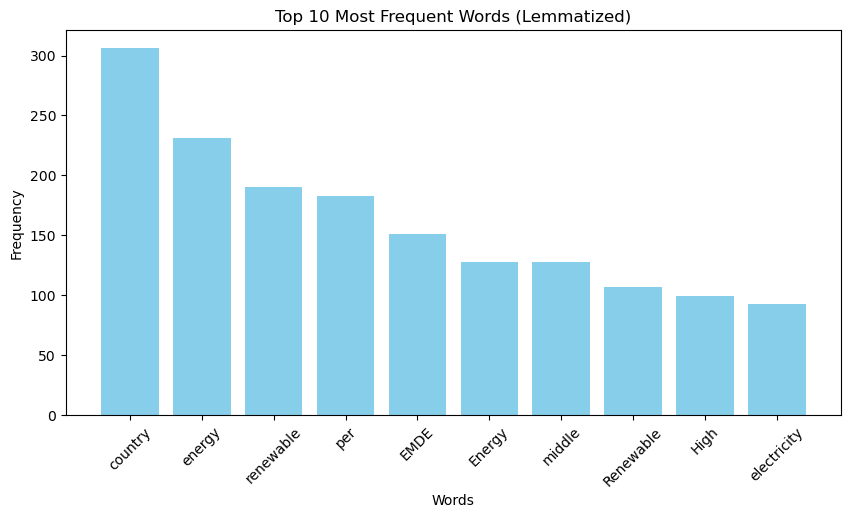

In [16]:
# Create word frequency distributions
freq_dist_stemmed = Counter(stemmed_words)
freq_dist_lemmatized = Counter(lemmatized_words)

# Print top 10 most common words
print("\nTop 10 words after stemming:")
for word, count in freq_dist_stemmed.most_common(10):
        print(f"{word}: {count}")

print("\nTop 10 words after lemmatization:")
for word, count in freq_dist_lemmatized.most_common(10):
        print(f"{word}: {count}")

    # Plot word frequency distribution (lemmatized version)
plt.figure(figsize=(10, 5))
most_common_words = freq_dist_lemmatized.most_common(10)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words (Lemmatized)")
plt.xticks(rotation=45)
plt.show()

### Create Wordcloud

In [18]:
from wordcloud import WordCloud

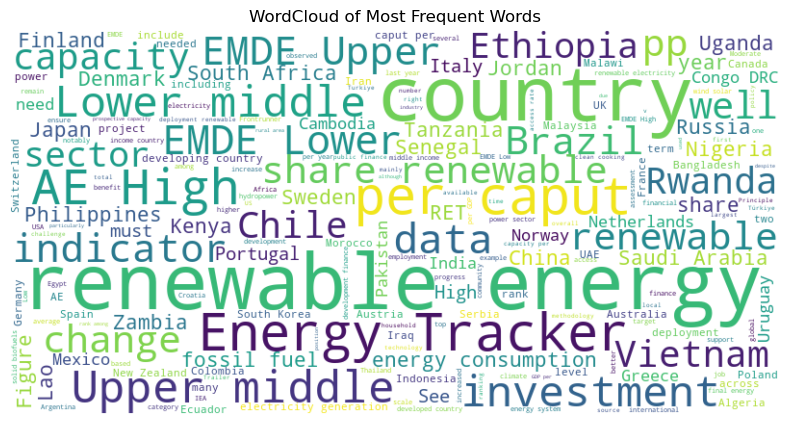

In [19]:
# Generate and plot WordCloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(lemmatized_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Most Frequent Words")
plt.show()

## Save the top 200 words as a list

In [21]:
# Get the top 200 most common words
top_200_words = freq_dist_lemmatized.most_common(200)

# Save the top 200 words as a list
top_200_list = [word for word, count in top_200_words]
print("\nTop 200 words list:", top_200_list)


Top 200 words list: ['country', 'energy', 'renewable', 'per', 'EMDE', 'Energy', 'middle', 'Renewable', 'High', 'electricity', 'renewables', 'Tracker', 'capacity', 'AE', 'caput', 'share', 'finance', 'access', 'income', 'year', 'http', 'South', 'also', 'Upper', 'sector', 'Lower', 'Africa', 'investment', 'change', 'RET', 'indicator', 'Brazil', 'fuel', 'Figure', 'pp', 'data', 'ranking', 'well', 'consumption', 'power', 'GDP', 'deployment', 'rank', 'Chile', 'development', 'Vietnam', 'New', 'among', 'project', 'top', 'Rwanda', 'Ethiopia', 'fossil', 'solar', 'Saudi', 'Kenya', 'across', 'Nigeria', 'generation', 'China', 'Jordan', 'Arabia', 'climate', 'Philippines', 'Denmark', 'Senegal', 'Korea', 'Russia', 'Japan', 'Congo', 'Laos', 'category', 'Sweden', 'Zambia', 'Finland', 'Uganda', 'Tanzania', 'Portugal', 'DRC', 'Italy', 'UAE', 'must', 'Netherlands', 'Norway', 'Uruguay', 'Pakistan', 'system', 'need', 'Greece', 'total', 'Mexico', 'India', 'Cambodia', 'last', 'developing', 'Colombia', 'Indonesi

In [22]:
with open("top_200_words.txt", "w") as file:
    for word, count in top_200_words:
            file.write(f"{word}\n")